In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# This project applying Dynamic Programming to predict the macroeconomics effects of the unexpected shock.

Consider a model economy where the social planner chooses an infinite sequence of consumption and next period's capital shock {c_t,k_t+1} to solve tje following sequential problem

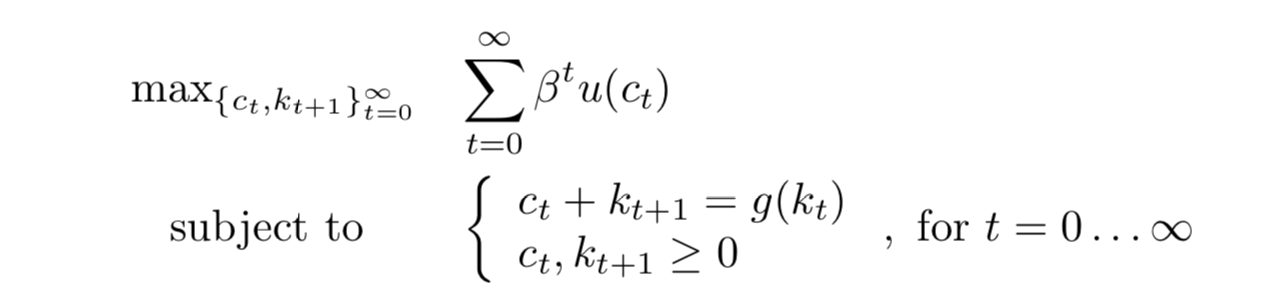

The utility function and production function take the following form：
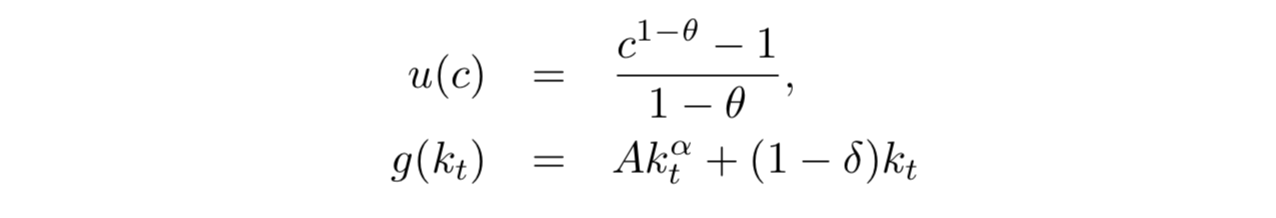

The associated contraction mapping is
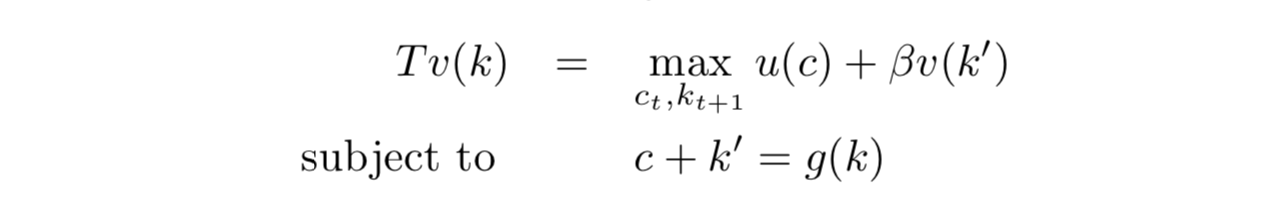

Set some parameter and the steady state form of capital  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A = 1.1; A_prime = 1; delta = 0.5; theta = 0.1; alpha = 0.5; beta = 0.95; epsilon = 100
k_ss = (alpha*A_prime*beta/(1-beta+beta*delta))**(1/(1-alpha))       # Compute initial steady state
k_bar = (A/delta)**(1/(1-alpha))                                     # Compute k bar value
k = np.array(np.arange(0,k_bar,0.002))                               # Discretize the domain of state variable k
k_prime = np.array(np.arange(0,k_bar,0.002)).reshape(-1,1)           # Discretize the domain of state variable k'
value = np.zeros(len(k)); value_list = [value]                       # Construct vactor of initial value and value's list
k_t = []; t = np.array(range(11)); shocks_time = 5                   # Set up time period and shocks time

Compute utility matrix

In [3]:
c = (A*(k**alpha))+(1-delta)*k - k_prime                             # Compute utility matrix
utility = ((c**(1-theta))-1)/(1-theta)
utility[np.isnan(utility)] = float("-inf")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


Iterating value function and plot the policy function (*relation between k_t and k_t+1*)

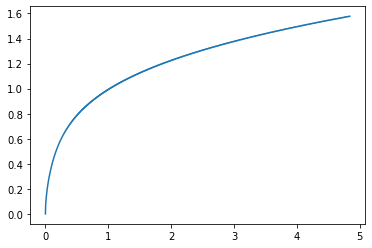

In [4]:
while epsilon > 0.0001:                                              # Iterating value function
    utility_matrix_new = np.add(utility,beta*value)
    value = np.max(utility_matrix_new,axis=0).reshape(-1,1)
    value_list.append(value)
    epsilon = abs((value_list[-1]-value_list[-2])).max()

policy_k = k_prime[np.argmax(utility_matrix_new,axis=0)].reshape(1,-1)[0]

plt.plot(k,policy_k)


In [5]:
i = (np.abs(k-k_ss)).argmin()                                         # Use policy function to find steady state path
while policy_k[i] != k[i]:                                            
    k_t.append(k[i])
    i = np.where(k == policy_k[i])[0][0]

for j in t:                                                           # Simulate while dynamic path of capital
    if shocks_time > j:
        k_t.insert(0,k[(np.abs(k-k_ss)).argmin()])
    else:
        k_t.append(k[i]) 
                                                                      # Simulate while dynamic path of c y x
c_t = [[A_prime*a**alpha+(1-delta)*a - b for a,b in zip(k_t[:shocks_time],k_t[1:shocks_time+1])]
       ,[A*a**alpha+(1-delta)*a - b for a,b in zip(k_t[shocks_time:],k_t[shocks_time+1:])]]
y_t = [[A_prime*a**alpha for a in k_t[:shocks_time]]
       ,[A*a**alpha for a in k_t[shocks_time:]]]
x_t = [[a-b for a,b in zip(y_t[0],c_t[0])],[a-b for a,b in zip(y_t[1],c_t[1])]]

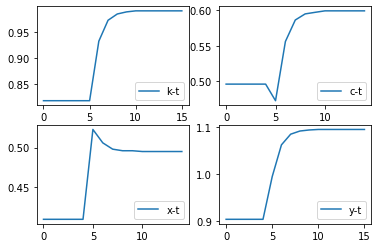

In [6]:
#  DP                                                                 # Plot dynamic path
plt.subplot(221) ; plt.plot(k_t,label="k-t") ; plt.legend(loc='lower right')
plt.subplot(222) ; plt.plot(c_t[0]+c_t[1],label="c-t") ; plt.legend(loc='lower right')
plt.subplot(223) ; plt.plot(x_t[0]+x_t[1],label="x-t") ; plt.legend(loc='lower right')
plt.subplot(224) ; plt.plot(y_t[0]+y_t[1],label="y-t") ; plt.legend(loc='lower right')
